**Downloading dataset and installing necessary libraries**

In [ ]:
# %pip install requests urllib if needed

import requests
from urllib.parse import urlencode


In [ ]:
import os
from os import path
import shutil
import random
import zipfile
import io
from sklearn.model_selection import train_test_split

Т.к. датасет уже загружен, комментируем строки ниже

In [ ]:
bucket_name = 'n2b'
session = boto3.session.Session()

ENDPOINT = "https://storage.yandexcloud.net"

session = boto3.Session(
    aws_access_key_id=(os.environ['token']),
    aws_secret_access_key=(os.environ['key_value']),
    region_name="ru-central1",
)

s3 = session.client(
    "s3", endpoint_url=ENDPOINT)

file_key = 'Сварные швы.zip'

response = s3.get_object(Bucket=bucket_name, Key=file_key)

file_content = response['Body'].read()
extract_path = 'raw_dataset/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(io.BytesIO(file_content)) as zip_file:
    zip_file.extractall(extract_path)

In [ ]:
extract_path_2 = 'dataset/'
os.makedirs(extract_path_2, exist_ok=True)

dataset_zip_path = os.path.join(extract_path, 'æóáα¡δÑ Φóδ/dataset.zip')

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path_2)

In [ ]:
for key in s3.list_objects(Bucket='n2b')['Contents']:
    print(key['Key'])

Сварные швы.zip


In [ ]:
%pip install -q git+https://github.com/THU-MIG/yolov10.git

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!mkdir -p weights
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh weights

total 408M
-rw-r--r-- 1 jupyter jupyter  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 jupyter jupyter 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 jupyter jupyter  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 jupyter jupyter  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 jupyter jupyter  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 jupyter jupyter 123M May 23 09:38 yolov10x.pt


In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
Updating files: 100% (580/580), done.


In [ ]:
%pip install -r yolov10/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 26.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: onnx
    Found existing installation: onnx 1.15.0
    Uninstalling onnx-1.15.0:
      Successfully uninstalled onnx-1.15.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: onnxruntime
    Found existing installation: onnxruntime 1.15.0
    Uninstalling onnxruntime-1.15.0:
      Successfully uninstalled onnxruntime-1.15.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 

In [ ]:
import os
original_dataset = 'dataset'
aug_dataset = 'aug_dataset'

os.makedirs(aug_dataset, exist_ok=True)

In [ ]:
# import shutil
# def copy_files(file_list, source_folder, dest_folder, ext):
#     for file in file_list:
#         base_name = os.path.splitext(file)[0]
#         source_file = os.path.join(source_folder, base_name + ext)
#         dest_file = os.path.join(dest_folder, base_name + ext)
#         if os.path.exists(source_file):
#             shutil.copy(source_file, dest_file)

# jpg_files = [f for f in os.listdir(original_dataset) if f.endswith('.jpg')]
# copy_files(jpg_files, original_dataset, aug_dataset, '.jpg')

# txt_files = [f for f in os.listdir(original_dataset) if f.endswith('.txt')]
# copy_files(txt_files, original_dataset, aug_dataset, '.txt')

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
source_folder = original_dataset
output_folder = 'datasets'
os.makedirs(output_folder, exist_ok=True)

train_dir = os.path.join(output_folder, 'train', 'images')
valid_dir = os.path.join(output_folder, 'valid', 'images')
test_dir = os.path.join(output_folder, 'test', 'images')
train_labels_dir = os.path.join(output_folder, 'train', 'labels')
valid_labels_dir = os.path.join(output_folder, 'valid', 'labels')
test_labels_dir = os.path.join(output_folder, 'test', 'labels')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(valid_labels_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)

jpg_files = [f for f in os.listdir(source_folder) if f.endswith('.jpg')]

# Разделение на train, val, test
train_files, test_files = train_test_split(jpg_files, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

# Функция для копирования файлов в указанную папку
def copy_files(file_list, source_folder, dest_folder, ext):
    for file in file_list:
        base_name = os.path.splitext(file)[0]
        source_file = os.path.join(source_folder, base_name + ext)
        dest_file = os.path.join(dest_folder, base_name + ext)
        if os.path.exists(source_file):
            shutil.copy(source_file, dest_file)

copy_files(train_files, source_folder, train_dir, '.jpg')
copy_files(train_files, source_folder, train_labels_dir, '.txt')
copy_files(val_files, source_folder, valid_dir, '.jpg')
copy_files(val_files, source_folder, valid_labels_dir, '.txt')
copy_files(test_files, source_folder, test_dir, '.jpg')
copy_files(test_files, source_folder, test_labels_dir, '.txt')

# Функция для перемещения файлов в указанную папку
# def move_files(file_list, source_folder, dest_folder, ext):
#     for file in file_list:
#         base_name = os.path.splitext(file)[0]
#         source_file = os.path.join(source_folder, base_name + ext)
#         dest_file = os.path.join(dest_folder, base_name + ext)
#         if os.path.exists(source_file):
#             shutil.move(source_file, dest_file)

# move_files(train_files, source_folder, train_dir, '.jpg')
# move_files(train_files, source_folder, train_labels_dir, '.txt')
# move_files(val_files, source_folder, valid_dir, '.jpg')
# move_files(val_files, source_folder, valid_labels_dir, '.txt')
# move_files(test_files, source_folder, test_dir, '.jpg')
# move_files(test_files, source_folder, test_labels_dir, '.txt')


In [ ]:
import os
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import cv2
from tqdm import tqdm
print(1)
def augment_image(image_path, annotation_path, save_path, pref):
    image = cv2.imread(image_path)
    bbs = []

    with open(annotation_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            left = (x_center - width / 2) * image.shape[1]
            top = (y_center - height / 2) * image.shape[0]
            right = (x_center + width / 2) * image.shape[1]
            bottom = (y_center + height / 2) * image.shape[0]
            bbs.append(BoundingBox(x1=left, y1=top, x2=right, y2=bottom, label=class_id))

    bbs_on_image = BoundingBoxesOnImage(bbs, shape=image.shape)

    # results yolov8s_test   mAP50-95 0.423 - 29 эпоха
    seq = iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 0.25)),
        iaa.AddToBrightness((-30, 30)),
        iaa.MultiplyHue((0.5, 1.5)),
        iaa.LinearContrast((0.8, 1.2)),
        iaa.LogContrast(gain=(0.6, 1.4)),
        iaa.ScaleX((0.75, 1.25)),
    ])

    # results yolov8s_test_2
    # seq = iaa.Sequential([
    #     iaa.MultiplyAndAddToBrightness(mul=(0.75, 1.25), add=(-35, 35)),
    #     iaa.MultiplyHueAndSaturation(mul_hue=(0.6, 1.3)),
    #     iaa.GammaContrast((0.5, 2.0), per_channel=True),
    #     iaa.LinearContrast((0.8, 1.2)),
    #     iaa.ScaleX((0.75, 1.25)),
    #     iaa.Resize({"height": 640, "width": 640}),
    # ])

    # results yolov8s_test_3
    # seq = iaa.Sequential([
    #     iaa.GaussianBlur(sigma=(0, 0.25)),
    #     iaa.MultiplyAndAddToBrightness(mul=(0.8, 1.2), add=(-30, 30)),
    #     iaa.MultiplyHueAndSaturation(mul_hue=(0.8, 1.2)),
    #     iaa.LinearContrast((0.8, 1.2)),
    #     iaa.LogContrast(gain=(0.6, 1.4)),
    #     iaa.ScaleX((0.75, 1.25)),
    # ])



    image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs_on_image)

    bbs_aug = bbs_aug.remove_out_of_image().clip_out_of_image()

    img_name = pref + image_path.split('/')[-1]
    label_name = img_name.replace('.jpg', '.txt')

    os.makedirs(os.getcwd() + f"/{save_path}/images", exist_ok=True)
    os.makedirs(os.getcwd() + f"/{save_path}/labels", exist_ok=True)

    cv2.imwrite(os.getcwd() + f"/{save_path}/images/{img_name}", image_aug)
    with open(os.getcwd() + f"/{save_path}/labels/{label_name}", 'w') as f:
        for bb in bbs_aug.bounding_boxes:
            x_center = (bb.x1 + bb.x2) / 2 / image.shape[1]
            y_center = (bb.y1 + bb.y2) / 2 / image.shape[0]
            width = (bb.x2 - bb.x1) / image.shape[1]
            height = (bb.y2 - bb.y1) / image.shape[0]

            if x_center < 0 or y_center < 0 or width < 0 or height < 0:
                continue

            f.write(f"{bb.label} {x_center} {y_center} {width} {height}\n")


def check_class(dataset_path, file):
    file = file.replace('.jpg', '.txt')
    cls = []
    with open(dataset_path + file) as f:
        for line in f.readlines():
            if line.strip():
                cls.append(int(line.strip().split()[0]))
    return cls

jpg_files = [f for f in os.listdir(output_folder + '/train/images') if f.endswith('.jpg')]


for i in tqdm(jpg_files):
    i_label = i.replace('.jpg', '.txt').replace('.png', '.txt')
    augment_image(os.getcwd() + '/' + output_folder + '/train/images/' + i, os.getcwd() + '/' + output_folder + '/train/labels/' + i_label, output_folder + '/train', 'augmented_')


under_cls_files = [
    f for f in os.listdir(output_folder + '/train/images')
    if f.endswith('.jpg') and any(i in check_class(output_folder + '/train/labels/', f) for i in [1, 3, 4])
]


for i in tqdm(under_cls_files):
    i_label = i.replace('.jpg', '.txt').replace('.png', '.txt')
    augment_image(os.getcwd() + '/' + output_folder + '/train/images/' + i, os.getcwd() + '/' + output_folder + '/train/labels/' + i_label, output_folder + '/train', 'augmented_')


under_cls_files = [
    f for f in os.listdir(output_folder + '/train/images')
    if f.endswith('.jpg') and any(i in check_class(output_folder + '/train/labels/', f) for i in [1,])
]


for i in tqdm(under_cls_files):
    i_label = i.replace('.jpg', '.txt').replace('.png', '.txt')
    augment_image(os.getcwd() + '/' + output_folder + '/train/images/' + i, os.getcwd() + '/' + output_folder + '/train/labels/' + i_label, output_folder + '/train', 'augmented_')

1


 96%|█████████▌| 657/685 [08:57<00:22,  1.24it/s]

In [ ]:
aa
yml_content = """
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['adj', 'int', 'geo', 'pro', 'non']
"""

with open(f'{output_folder}/data.yaml', 'w') as f:
    f.write(yml_content)

**Training**

In [ ]:
from ultralytics import YOLO
model = YOLO('weights/yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 60.2MB/s]


In [ ]:
output_folder = 'datasets'

In [ ]:
model.train(
    data=f'/home/jupyter/datasphere/project/{output_folder}/data.yaml',
    epochs=100,
    batch=50,
    imgsz=640,
    optimizer='SGD',
    project='yolov8m_final'
)

Модель побольше

In [ ]:
try:
    model = YOLO('yolov8l.pt')

    model.train(
        data=f'/home/jupyter/datasphere/project/{output_folder}/data.yaml',
        epochs=100,
        batch=20,
        imgsz=640,
        optimizer='SGD',
        project='yolov8l_right_aug'
    )
except:
    output_folder = 'datasets'
    model = YOLO('yolov8l.pt')

    model.train(
        data=f'/home/jupyter/datasphere/project/{output_folder}/data.yaml',
        epochs=100,
        batch=20,
        imgsz=640,
        optimizer='SGD',
        project='yolov8l_right_aug'
    )


New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-PCIE-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/jupyter/datasphere/project/datasets/data.yaml, epochs=100, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=yolov8l_right_aug, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

train: Scanning /home/jupyter/work/resources/datasets/train/labels... 2204 images, 193 backgrounds, 0 corrupt: 100%|██████████| 2204/2204 [04:41<00:00,  7.83it/s]


train: New cache created: /home/jupyter/work/resources/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/jupyter/work/resources/datasets/valid/labels... 72 images, 9 backgrounds, 0 corrupt:  41%|████▏     | 72/174 [00:10<00:16,  6.34it/s]

**Визуализация**

In [ ]:
%pip install supervision

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 1.8 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


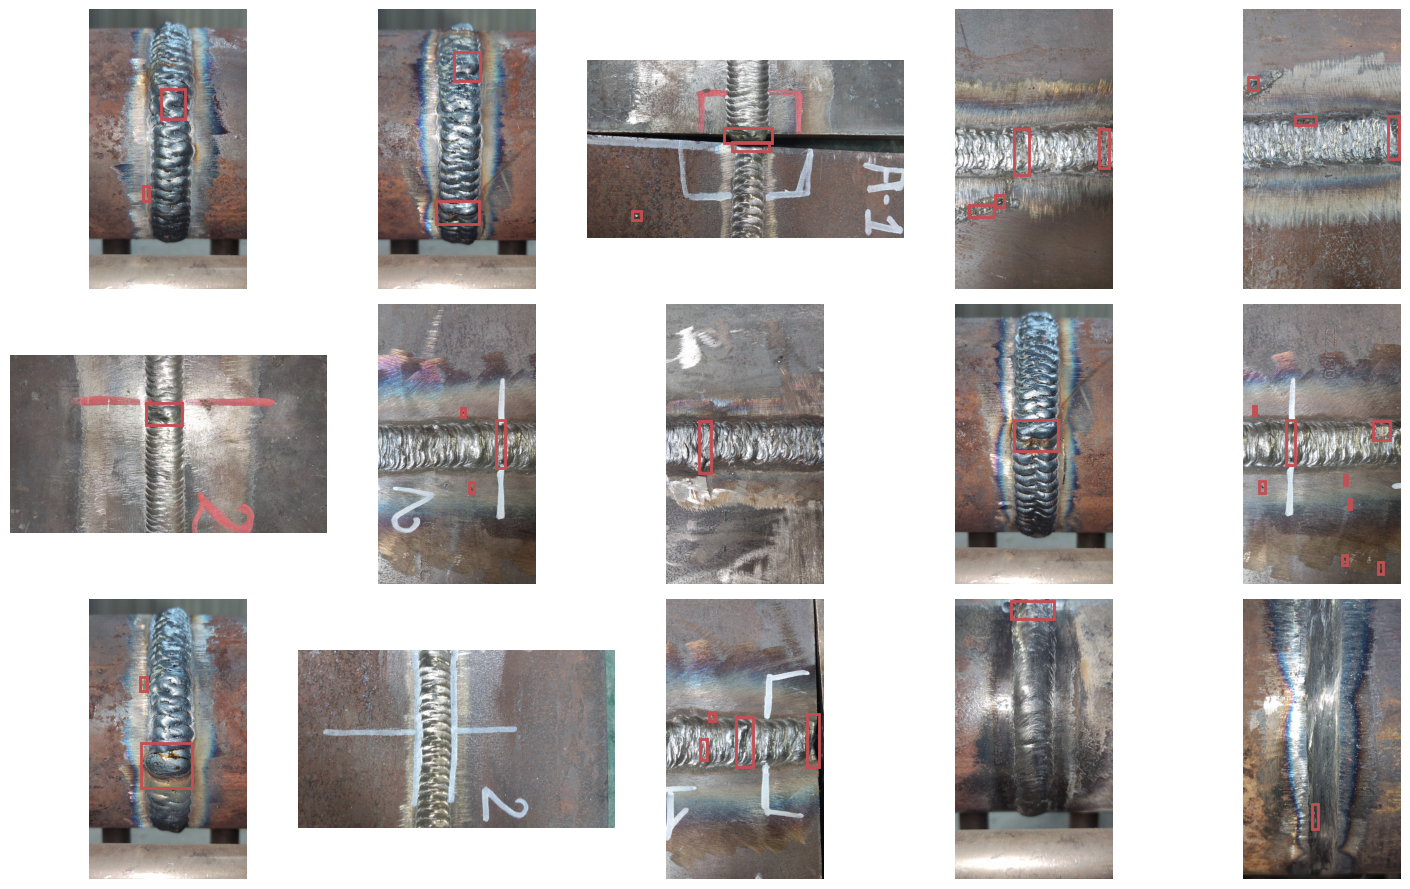

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def load_annotations(txt_path):
    annotations = []
    with open(txt_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            class_id = int(parts[0])
            bbox = list(map(float, parts[1:]))
            annotations.append((class_id, bbox))
    return annotations

def draw_bbox(ax, bbox, width, height):
    x_center, y_center, bbox_width, bbox_height = bbox
    x_center *= width
    y_center *= height
    bbox_width *= width
    bbox_height *= height

    x_min = x_center - bbox_width / 2
    y_min = y_center - bbox_height / 2

    rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

def visualize_dataset(dataset_path, nrows=3, ncols=5):
    image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]
    random.shuffle(image_files)

    num_images = nrows * ncols
    selected_files = image_files[:num_images]

    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 9))
    axes = axes.flatten()

    for ax, image_file in zip(axes, selected_files):
        image_path = os.path.join(dataset_path, image_file)
        txt_path = image_path.replace('.jpg', '.txt')

        if not os.path.exists(txt_path):
            ax.axis('off')
            continue

        image = Image.open(image_path)
        width, height = image.size
        annotations = load_annotations(txt_path)

        ax.imshow(image)
        for class_id, bbox in annotations:
            draw_bbox(ax, bbox, width, height)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig('example.png')
    plt.show()

visualize_dataset('dataset')


**Сабмит**

In [ ]:
import zipfile
dataset_zip_path = '/home/jupyter/datasphere/test_dataset.zip'
extract_path = '/home/jupyter/datasphere/project'
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os
import pandas as pd
from ultralytics import YOLO
from PIL import Image

model = YOLO('/home/jupyter/datasphere/project/yolov8l_final/train/weights/best.pt')

image_folder = '/home/jupyter/datasphere/project'

results_list = []

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)

        img = Image.open(image_path)

        results = model(img)

        for result in results:
            boxes = result.boxes.xywhn
            class_ids = result.boxes.cls

            for box, class_id in zip(boxes, class_ids):
                rel_x, rel_y, rel_width, rel_height = box.tolist()

                results_list.append([filename, int(class_id), rel_x, rel_y, rel_width, rel_height])


In [ ]:
df = pd.DataFrame(results_list, columns=['filename', 'class_id', 'rel_x', 'rel_y', 'width', 'height'])

df.to_csv('submission_3_l.csv', index=False, sep=';')